In [1]:
from Solvers import *
from TestProblems import *
from PlotFunctions import *
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Dormand-Prince

## Stability plot

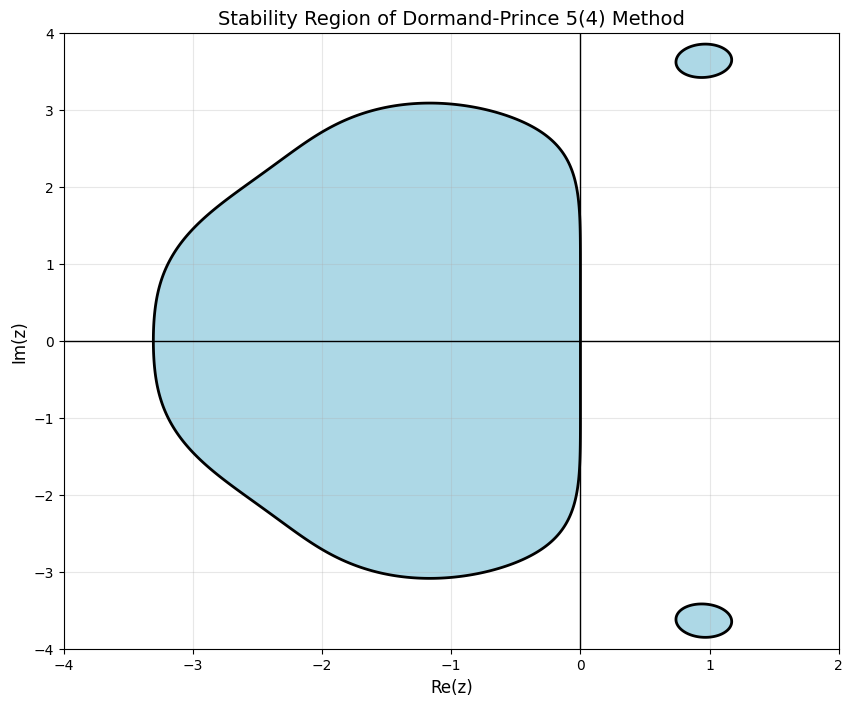

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

def dp54_stability_function(z):
    """Stability function for Dormand-Prince 5(4) method"""
    return 1 + z + z**2/2 + z**3/6 + z**4/24 + z**5/120 + z**6/600

def plot_stability_region():
    # Create grid in complex plane
    x = np.linspace(-4, 2, 500)
    y = np.linspace(-4, 4, 500)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    
    # Compute stability function magnitude
    R = np.abs(dp54_stability_function(Z))
    
    # Create figure
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, R, levels=[0, 1], colors=['lightblue'])
    plt.contour(X, Y, R, levels=[1], colors='black', linewidths=2)
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.title('Stability Region of Dormand-Prince 5(4) Method', fontsize=14)
    plt.xlabel('Re(z)', fontsize=12)
    plt.ylabel('Im(z)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

if __name__ == "__main__":
    plot_stability_region()

## Test on test problems

### Prey-predator

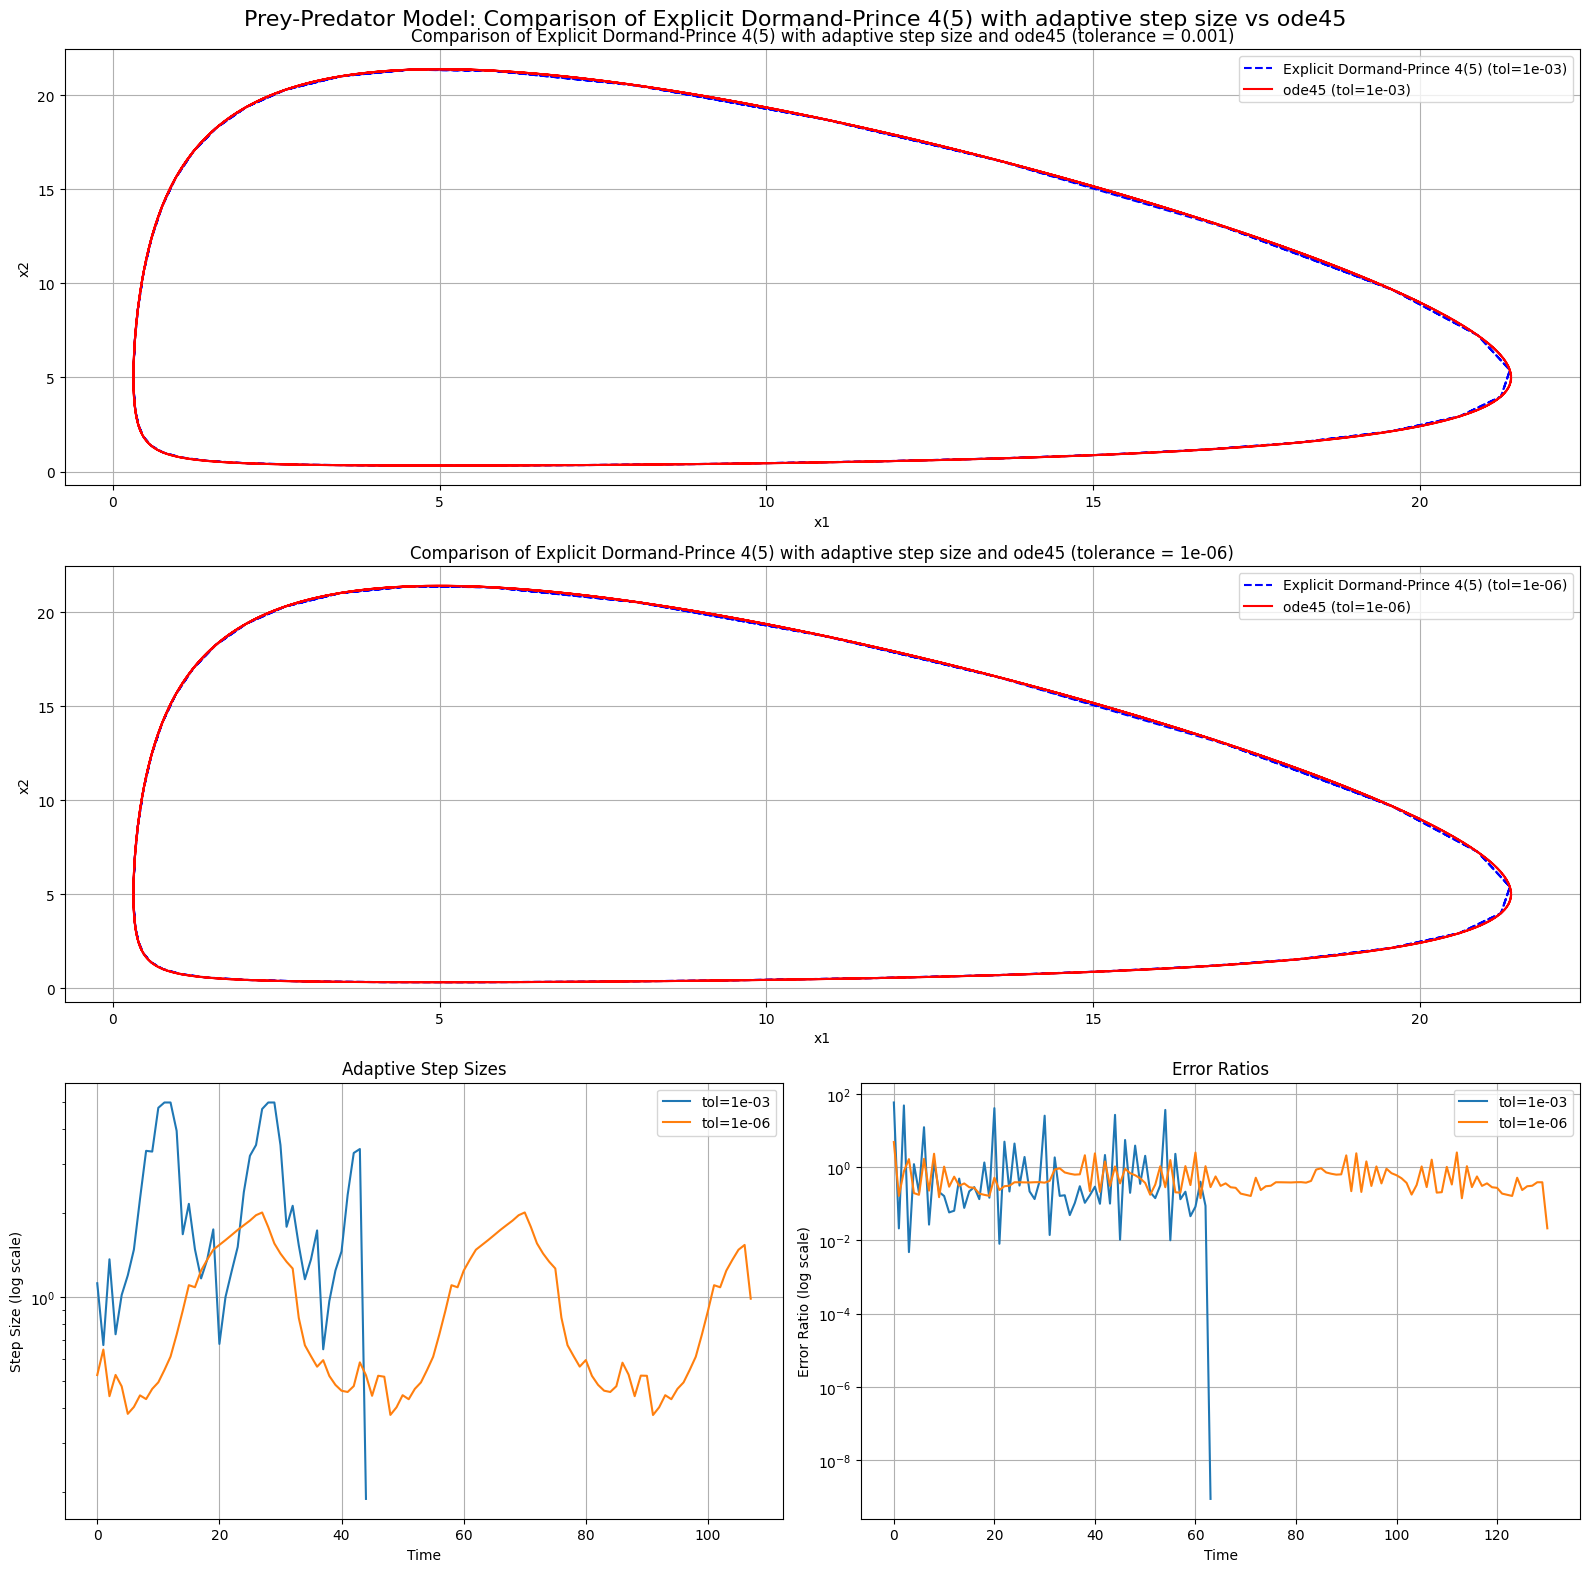

In [3]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate
pp_dopri_adaptive = compare_solvers(prey_predator_model, t_span, x0, params=(a, b), model_name="Prey-Predator Model", reference_solver_name = "ode45", adaptive_steps= True, explicit=True, dopri=True, steptype = "adaptive")


### CSTR 1 state

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `jac`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/Solvers.py:514: RuntimeWarning: divide by zero encountered in scalar divide
  h = min(hmax, max(hmin, 0.9 * h * (epstol / r)**0.2))


<Figure size 1600x1200 with 0 Axes>

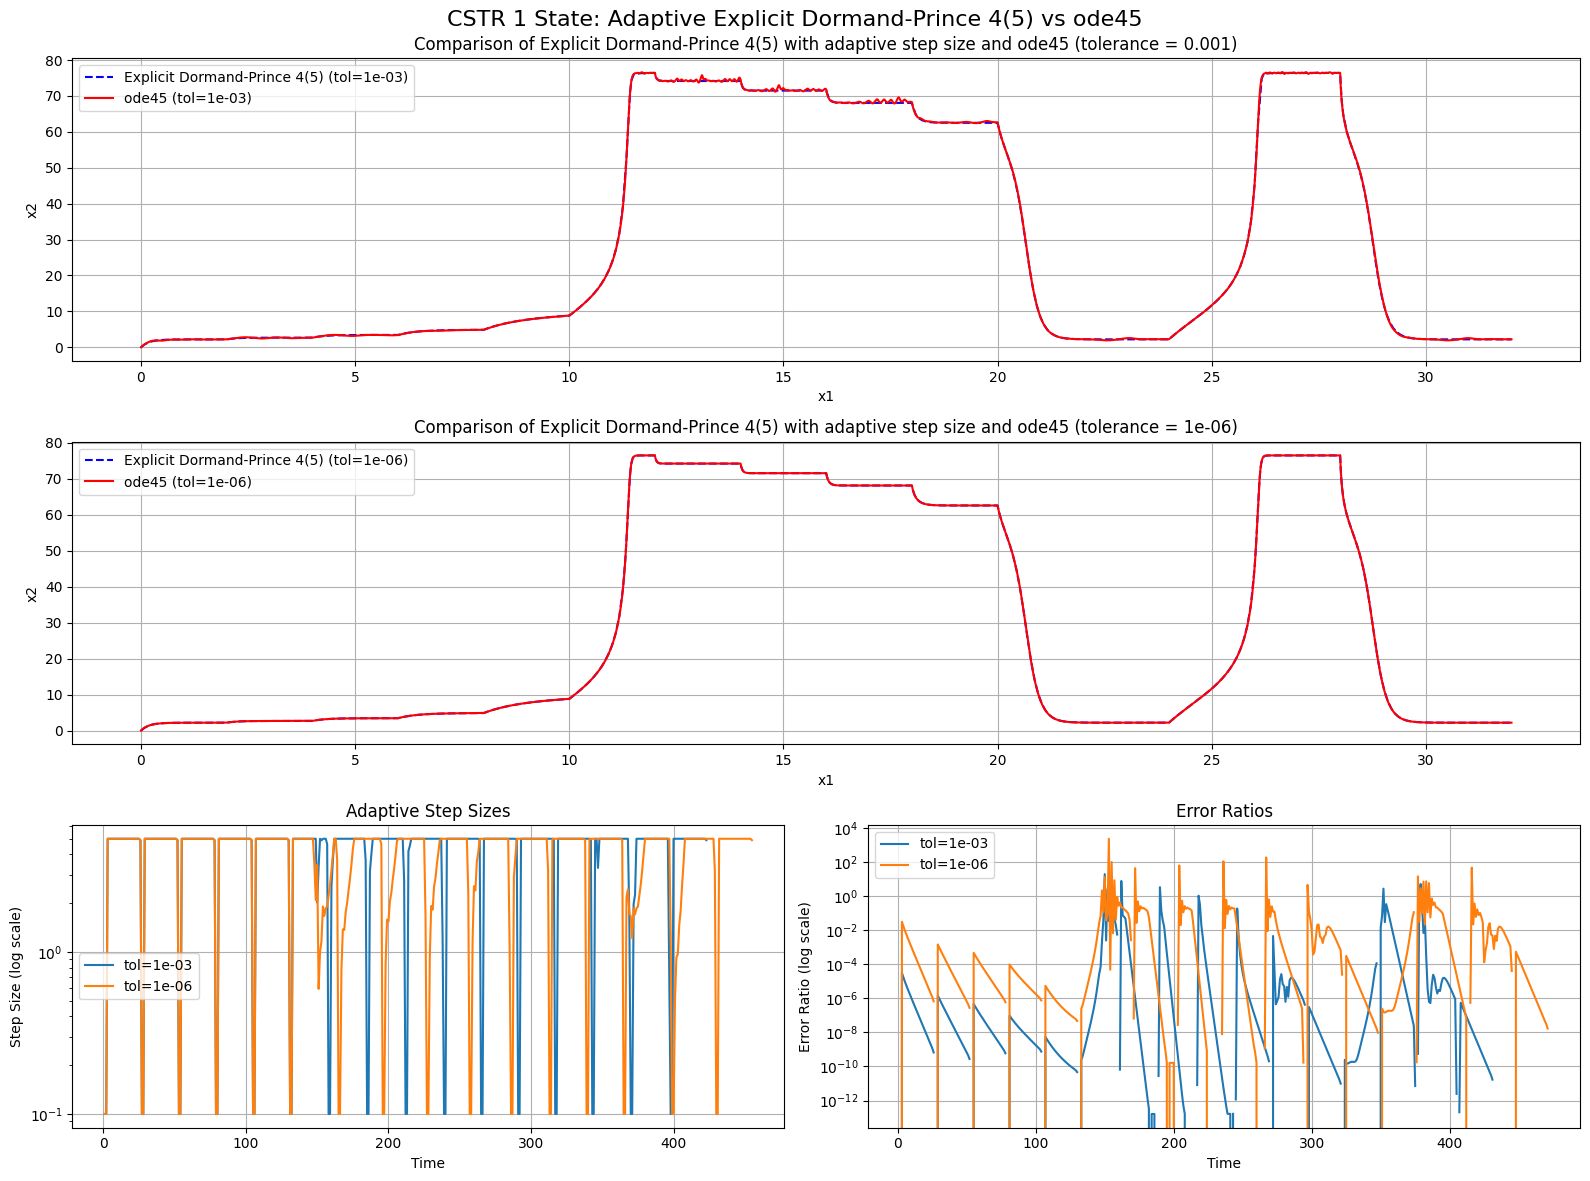

In [4]:
t_span = (0, 120)
cstr_dopri_adaptive = compare_solvers_cstr(CSTR_1state_model, t_span, model_name="CSTR 1 State", adaptive_steps= True, explicit=True, dopri=True, steptype = "adaptive")

### PFR 3 state

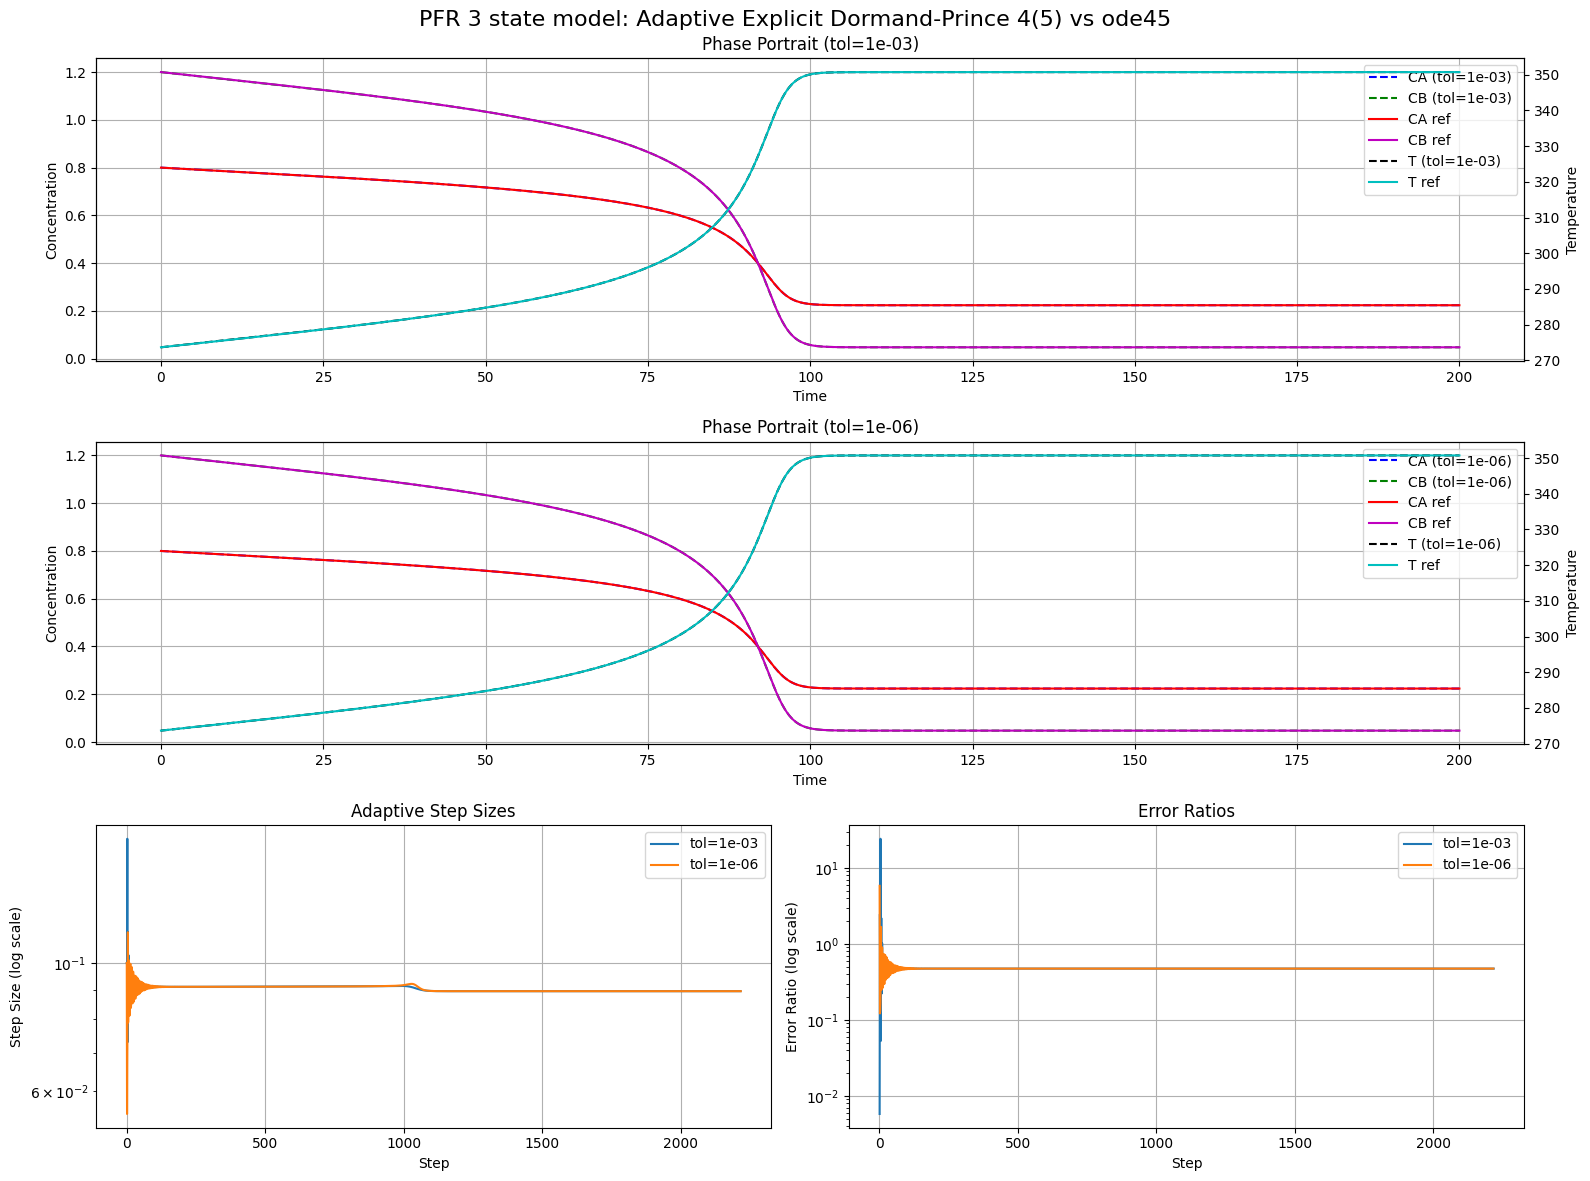

In [5]:
# Initial condition
n = 5  # number of spatial points

Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
x0 = np.concatenate([
    np.ones(n) * CA_in,    # CA initial
    np.ones(n) * CB_in,    # CB initial
    Tin*np.ones(n)  # T initial
])
t_span = (0, 200)

pfr_dopri_adaptive = compare_solvers_pfr(PFR_3state_model, t_span, x0, model_name = "PFR 3 state model", reference_solver_name="ode45", adaptive_steps = True, explicit = True, dopri = True, n = n)

## Summary

In [6]:
print("Dormand-Prince 5(4) with adaptive stepsize control:")
print("")
print("Prey-Predator Model, tolerance: 0.001")
print("Accepted steps: ", pp_dopri_adaptive[0.001]['n_accept'])
print("Rejected steps: ", pp_dopri_adaptive[0.001]['n_reject'])
print("Total number of steps: ", pp_dopri_adaptive[0.001]['n_accept'] + pp_dopri_adaptive[0.001]['n_reject'])
print("Total number of steps for ode45: ", pp_dopri_adaptive[0.001]['ref_nfun'])
print("")
print("Prey-predator Model, tolerance: 1e-6")
print("Accepted steps: ", pp_dopri_adaptive[1e-6]['n_accept'])
print("Rejected steps: ", pp_dopri_adaptive[1e-6]['n_reject'])
print("Total number of steps: ", pp_dopri_adaptive[1e-6]['n_accept'] + pp_dopri_adaptive[1e-6]['n_reject'])
print("Total number of steps for ode45: ", pp_dopri_adaptive[1e-6]['ref_nfun'])
print("")
print("CSTR 1 State Model, tolerance: 0.001")
print("Accepted steps: ", cstr_dopri_adaptive[0.001]['n_accept'])   
print("Rejected steps: ", cstr_dopri_adaptive[0.001]['n_reject'])
print("Total number of steps: ", cstr_dopri_adaptive[0.001]['n_accept'] + cstr_dopri_adaptive[0.001]['n_reject'])
print("Total number of steps for ode45: ", cstr_dopri_adaptive[0.001]['ref_nfun'])
print("")
print("CSTR 1 State Model, tolerance: 1e-6")
print("Accepted steps: ", cstr_dopri_adaptive[1e-6]['n_accept'])
print("Rejected steps: ", cstr_dopri_adaptive[1e-6]['n_reject'])
print("Total number of steps: ", cstr_dopri_adaptive[1e-6]['n_accept'] + cstr_dopri_adaptive[1e-6]['n_reject'])
print("Total number of steps for ode45: ", cstr_dopri_adaptive[1e-6]['ref_nfun'])
print("")
print("PFR 3 State Model, tolerance: 0.001")
print("Accepted steps: ", pfr_dopri_adaptive[0.001]['n_accept'])
print("Rejected steps: ", pfr_dopri_adaptive[0.001]['n_reject'])
print("Total number of steps: ", pfr_dopri_adaptive[0.001]['n_accept'] + pfr_dopri_adaptive[0.001]['n_reject'])
print("Total number of steps for ode45: ", pfr_dopri_adaptive[0.001]['ref_nfun'])
print("")
print("PFR 3 State Model, tolerance: 1e-6")
print("Accepted steps: ", pfr_dopri_adaptive[1e-6]['n_accept'])
print("Rejected steps: ", pfr_dopri_adaptive[1e-6]['n_reject'])
print("Total number of steps: ", pfr_dopri_adaptive[1e-6]['n_accept'] + pfr_dopri_adaptive[1e-6]['n_reject'])
print("Total number of steps for ode45: ", pfr_dopri_adaptive[1e-6]['ref_nfun'])
print("")


Dormand-Prince 5(4) with adaptive stepsize control:

Prey-Predator Model, tolerance: 0.001
Accepted steps:  46
Rejected steps:  19
Total number of steps:  65
Total number of steps for ode45:  242

Prey-predator Model, tolerance: 1e-6
Accepted steps:  109
Rejected steps:  23
Total number of steps:  132
Total number of steps for ode45:  734

CSTR 1 State Model, tolerance: 0.001
Accepted steps:  407
Rejected steps:  8
Total number of steps:  415
Total number of steps for ode45:  1148

CSTR 1 State Model, tolerance: 1e-6
Accepted steps:  846
Rejected steps:  24
Total number of steps:  870
Total number of steps for ode45:  2914

PFR 3 State Model, tolerance: 0.001
Accepted steps:  2217
Rejected steps:  4
Total number of steps:  2221
Total number of steps for ode45:  614

PFR 3 State Model, tolerance: 1e-6
Accepted steps:  2218
Rejected steps:  2
Total number of steps:  2220
Total number of steps for ode45:  614

